<a href="https://colab.research.google.com/github/bbchen33/Data-Science/blob/master/Data_wrangling_college_towns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd
from google.colab import files

In [2]:
files.upload()

Saving university.txt to university.txt


{'university.txt': b'Alabama[edit]\r\nAuburn (Auburn University)[1]\r\nFlorence (University of North Alabama)\r\nJacksonville (Jacksonville State University)[2]\r\nLivingston (University of West Alabama)[2]\r\nMontevallo (University of Montevallo)[2]\r\nTroy (Troy University)[2]\r\nTuscaloosa (University of Alabama, Stillman College, Shelton State)[3][4]\r\nTuskegee (Tuskegee University)[5]\r\nAlaska[edit]\r\nFairbanks (University of Alaska Fairbanks)[2]\r\nArizona[edit]\r\nFlagstaff (Northern Arizona University)[6]\r\nTempe (Arizona State University)\r\nTucson (University of Arizona)\r\nArkansas[edit]\r\nArkadelphia (Henderson State University, Ouachita Baptist University)[2]\r\nConway (Central Baptist College, Hendrix College, University of Central Arkansas)[2]\r\nFayetteville (University of Arkansas)[7]\r\nJonesboro (Arkansas State University)[8]\r\nMagnolia (Southern Arkansas University)[2]\r\nMonticello (University of Arkansas at Monticello)[2]\r\nRussellville (Arkansas Tech Unive

In [3]:
!ls

sample_data  university.txt


In [4]:
df = pd.read_table('university.txt', encoding = "ISO-8859-1", header = None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [5]:
df.head()

,0
0,Alabama[edit]
1,Auburn (Auburn University)[1]
2,Florence (University of North Alabama)
3,Jacksonville (Jacksonville State University)[2]
4,Livingston (University of West Alabama)[2]


In [0]:
df.columns = ['data']
state_name = []
for i in range(len(df)):
	if '[edit]' in df.data.iloc[i]:
		state_name.append(df.data.iloc[i][:-6])

In [7]:
print(state_name)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [0]:
state_row = df.loc[df.data.str.contains('edit')].index
df1 = df.data.str.split("(", expand = True) #separate the college town and the school name
state_city_dict = {}
for state in state_name:
	state_city_dict[state] = [] #placeholder to add the college towns

Then add the college towns to each state using the state_row dataframe that contains the index where every 'edit' occurs, also where each state occurs

In [0]:
for i in range(50):
	if i < 49:
		for a in range(state_row[i]+1, state_row[i+1]):
			state_city_dict[state_name[i]].append(df1[0][a])
	else:
		state_city_dict['Wyoming'].append(df1[0][566])

In [10]:
print(state_city_dict)

{'Alabama': ['Auburn ', 'Florence ', 'Jacksonville ', 'Livingston ', 'Montevallo ', 'Troy ', 'Tuscaloosa ', 'Tuskegee '], 'Alaska': ['Fairbanks '], 'Arizona': ['Flagstaff ', 'Tempe ', 'Tucson '], 'Arkansas': ['Arkadelphia ', 'Conway ', 'Fayetteville ', 'Jonesboro ', 'Magnolia ', 'Monticello ', 'Russellville ', 'Searcy '], 'California': ['Angwin ', 'Arcata ', 'Berkeley ', 'Chico ', 'Claremont ', 'Cotati ', 'Davis ', 'Irvine ', 'Isla Vista ', 'University Park, Los Angeles ', 'Merced ', 'Orange ', 'Palo Alto ', 'Pomona ', 'Redlands ', 'Riverside ', 'Sacramento ', 'University District, San Bernardino ', 'San Diego ', 'San Luis Obispo ', 'Santa Barbara ', 'Santa Cruz ', 'Turlock ', 'Westwood, Los Angeles ', 'Whittier '], 'Colorado': ['Alamosa ', 'Boulder ', 'Durango ', 'Fort Collins ', 'Golden ', 'Grand Junction ', 'Greeley ', 'Gunnison ', 'Pueblo, Colorado '], 'Connecticut': ['Fairfield ', 'Middletown ', 'New Britain ', 'New Haven ', 'New London ', 'Storrs ', 'Willimantic '], 'Delaware': [

To count number of college towns in each state

In [11]:
print(state_row)

Int64Index([  0,   9,  11,  15,  24,  50,  60,  68,  71,  84, 101, 103, 107,
            118, 132, 146, 153, 165, 174, 184, 195, 215, 236, 251, 257, 267,
            271, 279, 282, 290, 301, 307, 339, 358, 361, 384, 396, 407, 451,
            454, 466, 471, 485, 508, 515, 522, 535, 541, 551, 565],
           dtype='int64')


In [0]:
num_of_town = {}
for i in range(49):
  num_of_town[state_name[i]] = state_row[i+1]-state_row[i]-1
  
num_of_town_df = pd.DataFrame(num_of_town, index = [0])

In [13]:
print(num_of_town_df)

   Alabama  Alaska  Arizona  ...  Washington  West Virginia  Wisconsin
0        8       1        3  ...           5              9         13

[1 rows x 49 columns]


In [14]:
num_of_town_df = num_of_town_df.transpose()
print(num_of_town_df)

                 0
Alabama          8
Alaska           1
Arizona          3
Arkansas         8
California      25
Colorado         9
Connecticut      7
Delaware         2
Florida         12
Georgia         16
Hawaii           1
Idaho            3
Illinois        10
Indiana         13
Iowa            13
Kansas           6
Kentucky        11
Louisiana        8
Maine            9
Maryland        10
Massachusetts   19
Michigan        20
Minnesota       14
Mississippi      5
Missouri         9
Montana          3
Nebraska         7
Nevada           2
New Hampshire    7
New Jersey      10
New Mexico       5
New York        31
North Carolina  18
North Dakota     2
Ohio            22
Oklahoma        11
Oregon          10
Pennsylvania    43
Rhode Island     2
South Carolina  11
South Dakota     4
Tennessee       13
Texas           22
Utah             6
Vermont          6
Virginia        12
Washington       5
West Virginia    9
Wisconsin       13


In [27]:
num_of_town_df.columns = ['num']
print(num_of_town_df)

                num
Alabama           8
Alaska            1
Arizona           3
Arkansas          8
California       25
Colorado          9
Connecticut       7
Delaware          2
Florida          12
Georgia          16
Hawaii            1
Idaho             3
Illinois         10
Indiana          13
Iowa             13
Kansas            6
Kentucky         11
Louisiana         8
Maine             9
Maryland         10
Massachusetts    19
Michigan         20
Minnesota        14
Mississippi       5
Missouri          9
Montana           3
Nebraska          7
Nevada            2
New Hampshire     7
New Jersey       10
New Mexico        5
New York         31
North Carolina   18
North Dakota      2
Ohio             22
Oklahoma         11
Oregon           10
Pennsylvania     43
Rhode Island      2
South Carolina   11
South Dakota      4
Tennessee        13
Texas            22
Utah              6
Vermont           6
Virginia         12
Washington        5
West Virginia     9
Wisconsin        13


Text(0, 0.5, 'number of town')

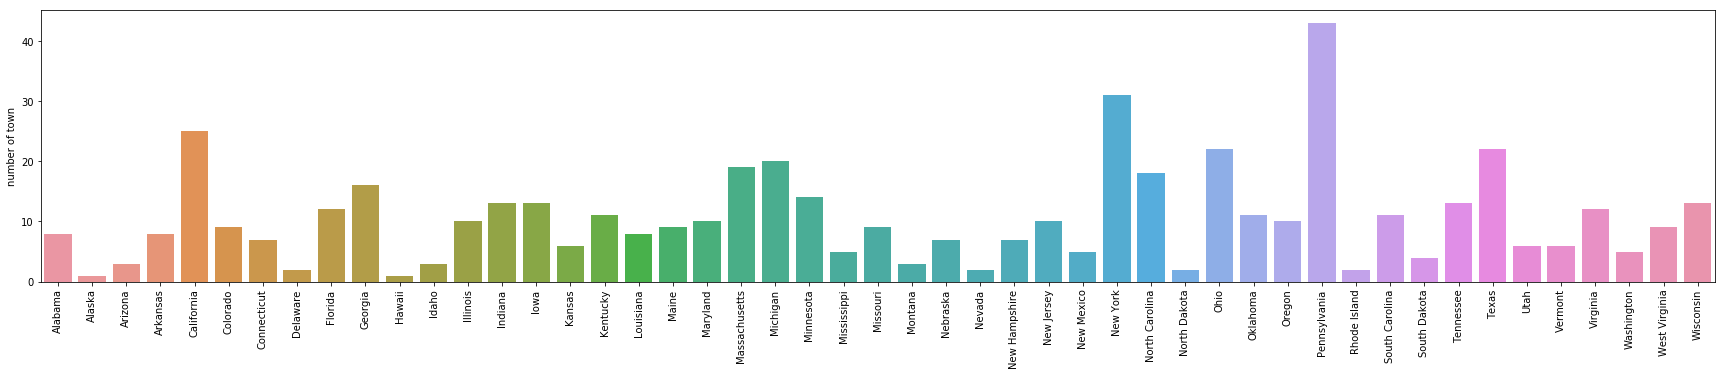

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plot = sns.barplot(num_of_town_df.index,num_of_town_df.num)
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
plt.ylabel('number of town')

In [32]:
print(f'The total number of college towns: {num_of_town_df.sum()}')

The total number of college towns: 516


In [36]:
print('The college towns in Alabama:',state_city_dict['Alabama'])

The college towns in Alabama: ['Auburn ', 'Florence ', 'Jacksonville ', 'Livingston ', 'Montevallo ', 'Troy ', 'Tuscaloosa ', 'Tuskegee ']


The state with highest number of college towns

In [38]:
num_of_town_df.loc[num_of_town_df.idxmax()]

,num
Pennsylvania,43


Find what state a college town belongs to, use a for loop below.

In [44]:
for key in state_city_dict:
  if 'Florence' in ','.join(state_city_dict[key]):
    print(key)

Alabama
South Carolina
